<a href="https://colab.research.google.com/github/andrejfg/Model-for-Analysis-and-Prediction-of-Judicial-Sentence-Corpus/blob/main/Model_for_Analysis_and_Prediction_of_Judicial_Sentence_Corpus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FCM para agrupamento de textos

In [ ]:
import glob
import numpy as np
import pandas as pd
from google.colab import drive
from sklearn import preprocessing

## Importação dos dados

montagem do drive e importação dos arquivos .txt

In [ ]:
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
path = "path_to_you_folder_with_txts"

In [ ]:
file_names = glob.glob(path + "/*txt")

Função para remover o prefixo de uma decisão judicial.

Função para leitura do arquivo e armazenamento em um dataframe

In [ ]:
processo = {'id': [], 'corpo_do_texto': [], 'classificacao': []}
processo_df = pd.DataFrame.from_dict(processo)

texts = list()
for file_name in file_names:
  f = open(file_name)
  file_name_splited = file_name.split("/")[-1].replace(".txt","").split("_")
  id = file_name_splited[0]
  classificacao = file_name_splited[-1]
  lines = f.readlines()
  text = " ".join(lines).replace("/n"," ")
  row = {'id': id, 'corpo_do_texto': text, 'classificacao': classificacao}
  processo_df = processo_df.append(row, ignore_index = True)


In [ ]:
processo_df

,id,corpo_do_texto,classificacao
0,400180042709,I- RELATÓRIO\n ANDRESA DA SILVA CRUZ ajuizou A...,improcedente
1,5000004-15.2019.8.13.0400,"I- RELATÓRIO\n ARLINDA OLIVEIRA DE JESUS, qual...",procedente
2,5000157-48.2019.8.13.0400,"I- RELATÓRIO\n MARIA LUCIA LEONEL ANICETO, qua...",parcialmente
3,5000408-66.2019.8.13.0400,"I- RELATÓRIO\n \n GERALDO DAS MERCÊS CORREA, r...",parcialmente
4,5000426-87.2019.8.13.0400,"I- RELATÓRIO\n LÍLIA LIBERATO FRANCISCO, quali...",parcialmente
5,0034383-04.2018.8.13.0400,I- RELATÓRIO\n MINISTÉRIO PÚBLICO DO ESTADO DE...,procedente
6,5000491-82.2019.8.13.0400,"I- RELATÓRIO\n JOSÉ RAIMUNDO SEVERINO, qualifi...",parcialmente
7,5001335-32.2019.8.13.0400,"I- RELATÓRIO\n AIRTON MOREIRA GONÇALVES, repre...",parcialmente
8,0030290-95.2018.8.13.0400,"I- RELATÓRIO\n MANOEL LEÔNCIO DOS REIS, qualif...",procedente
9,5000177-73.2018.8.13.0400,"I- RELATÓRIO\n AMADEU ANTONIO GONÇALVES, quali...",procedente


In [ ]:
n_elementos_menor_classe = np.min(list(processo_df['classificacao'].value_counts()))
print("Menor classe tem " + str(n_elementos_menor_classe) + " elementos")
print(processo_df['classificacao'].value_counts())

Menor classe tem 7 elementos
procedente      24
parcialmente    16
improcedente     7
Name: classificacao, dtype: int64


In [ ]:
remove_improcedente = False
if (remove_improcedente):
  processo_df.drop(processo_df[processo_df['classificacao'] == "improcedente"].index, inplace = True)
  processo_df = processo_df.reset_index()
  processo_df.head()

In [ ]:
le = preprocessing.LabelEncoder()
processo_df['classificacao'] = le.fit_transform(processo_df['classificacao'].ravel())
classes = le.classes_
le.classes_

array(['improcedente', 'parcialmente', 'procedente'], dtype=object)

In [ ]:
processo_df

,id,corpo_do_texto,classificacao
0,400180042709,I- RELATÓRIO\n ANDRESA DA SILVA CRUZ ajuizou A...,0
1,5000004-15.2019.8.13.0400,"I- RELATÓRIO\n ARLINDA OLIVEIRA DE JESUS, qual...",2
2,5000157-48.2019.8.13.0400,"I- RELATÓRIO\n MARIA LUCIA LEONEL ANICETO, qua...",1
3,5000408-66.2019.8.13.0400,"I- RELATÓRIO\n \n GERALDO DAS MERCÊS CORREA, r...",1
4,5000426-87.2019.8.13.0400,"I- RELATÓRIO\n LÍLIA LIBERATO FRANCISCO, quali...",1
5,0034383-04.2018.8.13.0400,I- RELATÓRIO\n MINISTÉRIO PÚBLICO DO ESTADO DE...,2
6,5000491-82.2019.8.13.0400,"I- RELATÓRIO\n JOSÉ RAIMUNDO SEVERINO, qualifi...",1
7,5001335-32.2019.8.13.0400,"I- RELATÓRIO\n AIRTON MOREIRA GONÇALVES, repre...",1
8,0030290-95.2018.8.13.0400,"I- RELATÓRIO\n MANOEL LEÔNCIO DOS REIS, qualif...",2
9,5000177-73.2018.8.13.0400,"I- RELATÓRIO\n AMADEU ANTONIO GONÇALVES, quali...",2


## NLP

In [ ]:
!pip install spacy==3.3
!python -m spacy download pt_core_news_lg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-05 15:11:56.584616: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-05 15:11:59.364549: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-05 15:11:59.364759: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could no

In [ ]:
import spacy

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
nlp = spacy.load('pt_core_news_lg')

Função para recuperar o lema de cada token ignorando as palavras sem relevância no texto(stop_words, pontos, números e espaços)

In [ ]:
nlp.Defaults.stop_words.add('fls')
nlp.Defaults.stop_words.add('rel')
nlp.Defaults.stop_words.add('000')
nlp.Defaults.stop_words.add('2014')

In [ ]:
def spacy_tokenizer(sentence):
  sentence = sentence.lower()
  list = [word.lemma_ for word in nlp(sentence) if not (word.is_stop or
                                                        word.like_num or
                                                        word.is_punct or
                                                        word.is_space or
                                                        len(word) <= 2)]
  list = ' '.join([str(element) for element in list])

  return list

In [ ]:
processo_df['corpo_do_texto'] = processo_df['corpo_do_texto'].apply(spacy_tokenizer)

Exemplo de texto pre-processado

In [ ]:
processo_df['corpo_do_texto'][0]

'relatório andrês Silva Cruz ajuizar ação cominatório pedido tutela antecipar face município Mariana alegar acometido Cervicobraquialgia crônico causar intenso dor mal-estar aduz necessitar submetir urgência procedimento cirúrgico mamoplastia redutora evitar agravamento quadro postular autor razão de esse fato condenação obrigação consubstanciar realização procedimento cirúrgico descrever petição inicial pena multa diário petição inicial instruir documento pedido tutela antecipar indeferir decisão 26/26v mesmo oportunidade deferir justiça gratuito autor regularmente citar réu apresentar contestação arguir preliminar litisconsórcio necessário mérito pugnar improcedência pedido seguinte alegação cirurgia pleitear autora natureza eletivo haver urgência realização procedimento determinação judicial tratamento oportunizar privilégio amparar isonomia exiger serviço público previsão orçamentário realização procedimento cirúrgico âmbito municipal devida alto complexidade contestação vier docum

importacao da biblioteca tf idf

tf–idf é uma medida estatística que tem o intuito de indicar a importância de uma palavra de um documento em relação a uma coleção de documentos ou em um corpus linguístico.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(analyzer = 'word', ngram_range = (1,4), binary = False, lowercase = True, min_df = 2, norm = 'l2', stop_words = None, use_idf = True)

In [ ]:
X = vectorizer.fit_transform(processo_df['corpo_do_texto'])

In [ ]:
vectorizer.get_feature_names_out()

array(['000', '000 armar', '000 armar freire', ..., 'único saúde prazo',
       'único saúde prazo hora', 'único saúde sus'], dtype=object)

# Aprendizagem

In [ ]:
from scipy.sparse import csr_matrix
from sklearn.metrics import accuracy_score
from sklearn.utils import class_weight
from sklearn.model_selection import StratifiedKFold, train_test_split

from sklearn import svm
from xgboost import XGBClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
n_dobras = 4
random_state = 42

In [ ]:
def train_test_split_folds(X,y,n_dobras,random_state=42):
  X_train = {}
  y_train = {}
  X_test = {}
  y_test = {}

  skf = StratifiedKFold(n_dobras, shuffle=True, random_state=random_state)

  for i, (train_index, test_index) in enumerate(skf.split(X,y)):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train[i] = csr_matrix(X[train_index])
    X_test[i] = csr_matrix(X[test_index])
    y_train[i] = list(y[train_index])
    y_test[i] = list(y[test_index])

  return X_train, X_test, y_train, y_test

In [ ]:
def trata_porcentagem(ponto_flutuante):
  return round(ponto_flutuante*100,2)

In [ ]:
def cria_pesos(classes, y_train, y_test):
  classes_weight = class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(classes),y=y_train)
  weights = list()
  for i in y_test:
    weights.append(classes_weight[i])
  return weights

In [ ]:
modelos = dict()
modelos["RandomForest"] = RandomForestClassifier(class_weight='balanced')
modelos["XGBClassifier"] = XGBClassifier()
modelos["SVM"] = svm.SVC(class_weight='balanced')
modelos["Ridge"] = RidgeClassifier(class_weight='balanced', tol=1e-2, solver="sparse_cg")
modelos["LogisticRegression"] = LogisticRegression(class_weight='balanced')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split_folds(X,processo_df['classificacao'],n_dobras,random_state=random_state)

TRAIN: [ 1  3  4  5  6  7  8  9 10 12 14 16 17 18 19 20 22 23 24 26 27 28 29 30
 31 32 33 38 39 40 42 43 44 45 46] TEST: [ 0  2 11 13 15 21 25 34 35 36 37 41]
TRAIN: [ 0  1  2  3  4  5  8  9 11 12 13 15 17 19 21 22 23 24 25 26 27 28 29 30
 32 33 34 35 36 37 40 41 42 44 46] TEST: [ 6  7 10 14 16 18 20 31 38 39 43 45]
TRAIN: [ 0  1  2  3  6  7  9 10 11 12 13 14 15 16 18 19 20 21 22 25 26 31 34 35
 36 37 38 39 40 41 42 43 44 45 46] TEST: [ 4  5  8 17 23 24 27 28 29 30 32 33]
TRAIN: [ 0  2  4  5  6  7  8 10 11 13 14 15 16 17 18 20 21 23 24 25 27 28 29 30
 31 32 33 34 35 36 37 38 39 41 43 45] TEST: [ 1  3  9 12 19 22 26 40 42 44 46]


acurácia levando em consideração o balanceamento.

In [ ]:
melhor_media = 0
for nome, modelo in modelos.items():
  print("Modelo: ",nome)
  accuracies = list()

  for i in range(len(X_train)):
    weight = cria_pesos(np.unique(y_train[i]),y_train[i],y_train[i])
    modelo.fit(X_train[i],y_train[i],sample_weight=weight)
    y_predict = modelo.predict(X_test[i])
    weight =  cria_pesos(np.unique(y_train[i]),y_train[i],y_test[i])
    accuracies.append(accuracy_score(y_true=y_test[i], y_pred=y_predict, sample_weight=weight))
    print("Fold", i+1, ":", trata_porcentagem(accuracies[-1]),"%")

  media = np.mean(accuracies)
  print("Média:",trata_porcentagem(media),"%")
  if(media > melhor_media):
    melhor_media = media
    melhor_modelo = nome
  print()
print("Melhor modelo:", melhor_modelo)

Modelo:  RandomForest
Fold 1 : 65.62 %
Fold 2 : 100.0 %
Fold 3 : 73.44 %
Fold 4 : 70.0 %
Média: 77.27 %

Modelo:  XGBClassifier
Fold 1 : 65.62 %
Fold 2 : 89.58 %
Fold 3 : 65.62 %
Fold 4 : 76.67 %
Média: 74.37 %

Modelo:  SVM
Fold 1 : 65.62 %
Fold 2 : 73.96 %
Fold 3 : 70.83 %
Fold 4 : 70.0 %
Média: 70.1 %

Modelo:  Ridge
Fold 1 : 84.38 %
Fold 2 : 94.79 %
Fold 3 : 81.77 %
Fold 4 : 70.0 %
Média: 82.73 %

Modelo:  LogisticRegression
Fold 1 : 73.96 %
Fold 2 : 89.58 %
Fold 3 : 71.35 %
Fold 4 : 70.0 %
Média: 76.22 %

Melhor modelo: Ridge


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def plot_confusion_matrix(data, labels):

    sns.set(color_codes=True)
    plt.figure(1, figsize=(9, 6))
 
    plt.title("Matriz de Confusão (%)")
 
    sns.set(font_scale=1.4)
    ax = sns.heatmap(data, annot=True,cmap="Blues", cbar_kws={'label': 'Acurácia (%)'}, fmt=".0%")
 
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
 
    ax.set(ylabel="Verdadeira", xlabel="Predição")

    #plt.savefig(output_filename, bbox_inches='tight', dpi=300)
    plt.show()
    plt.close()

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(csr_matrix.toarray(X),processo_df['classificacao'],test_size=0.2)

In [ ]:
modelo = RidgeClassifier()
weight = cria_pesos(np.unique(y_train),y_train,y_train)
modelo.fit(X_train, y_train, sample_weight=weight)
y_predict = modelo.predict(X_test)
weight = cria_pesos(np.unique(y_train),y_train,y_test)
acuracia = accuracy_score(y_true=y_test, y_pred=y_predict, sample_weight=weight)
print("Acurácia:",trata_porcentagem(acuracia), "%")

Acurácia: 82.18 %


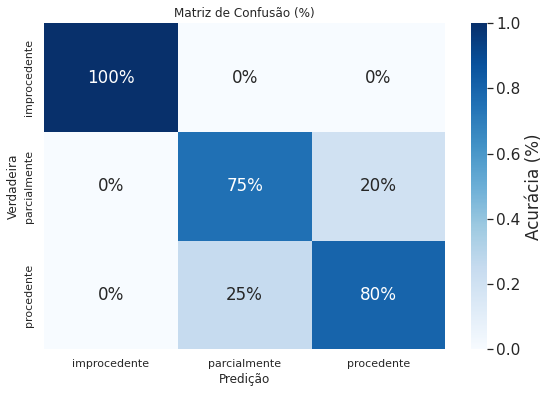

In [ ]:
cf_matrix = confusion_matrix(y_test, y_predict) 

max_cf_matrix = list()
for row in cf_matrix.T:
  max_cf_matrix.append(sum(row))
plot_confusion_matrix(cf_matrix/max_cf_matrix, le.classes_)

In [ ]:
explainer = shap.Explainer(modelo, X)
shap_values = explainer.shap_values(X_test)

improcedente


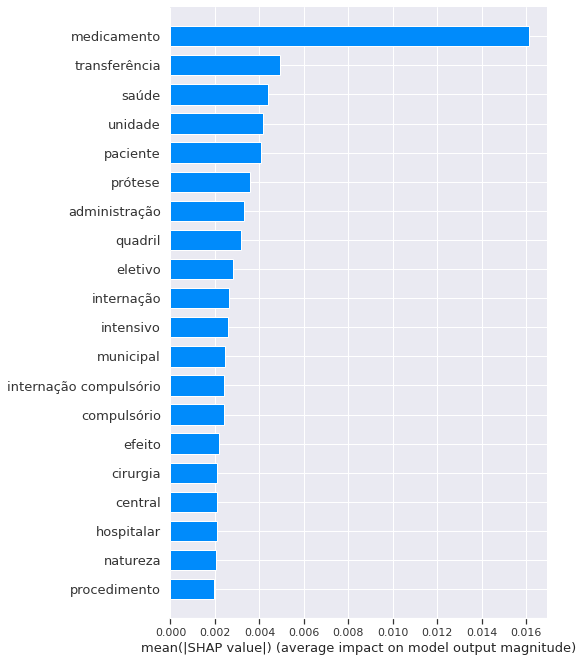

parcialmente


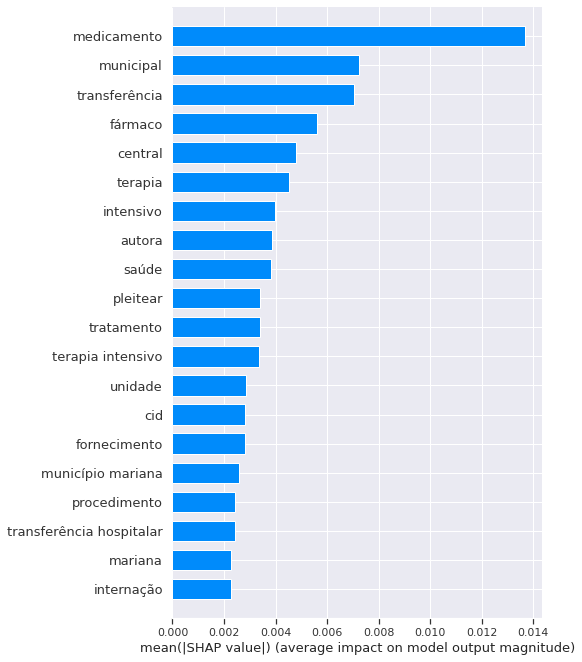

procedente


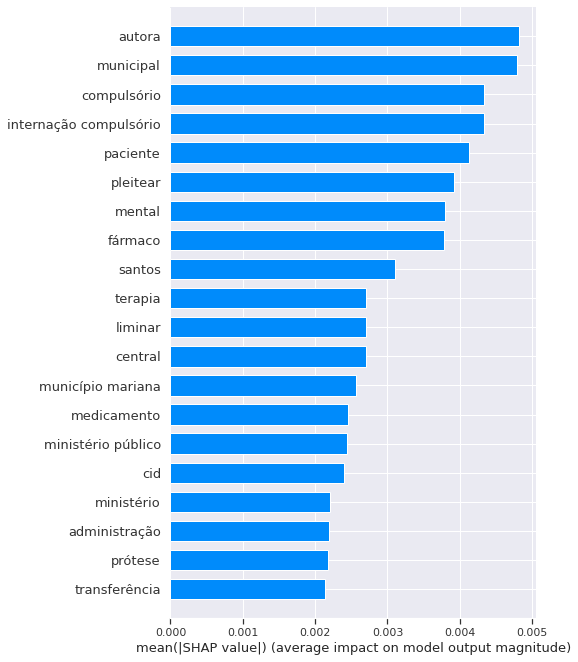

In [ ]:
shap.initjs()
for i, shap_value in enumerate(shap_values):
  print(le.classes_[i])
  shap.summary_plot(shap_value, X_test, class_names=le.classes_[i],feature_names=vectorizer.get_feature_names_out(), plot_type="bar")

In [ ]:
modelo = RandomForestClassifier()
weight = cria_pesos(np.unique(y_train),y_train,y_train)
modelo.fit(X_train, y_train, sample_weight=weight)
y_predict = modelo.predict(X_test)
weight = cria_pesos(np.unique(y_train),y_train,y_test)
acuracia = accuracy_score(y_true=y_test, y_pred=y_predict, sample_weight=weight)
print("Acurácia:",trata_porcentagem(acuracia), "%")

Acurácia: 89.08 %


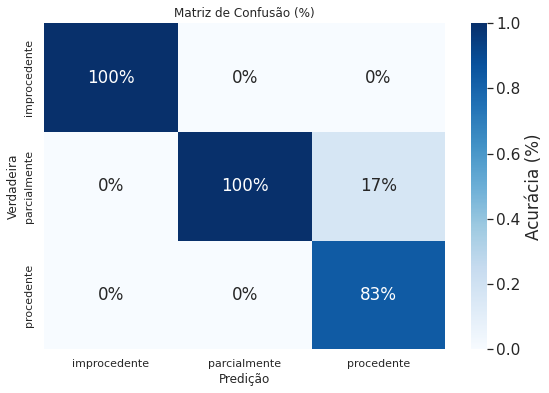

In [ ]:
cf_matrix = confusion_matrix(y_test, y_predict) 

max_cf_matrix = list()
for row in cf_matrix.T:
  max_cf_matrix.append(sum(row))
plot_confusion_matrix(cf_matrix/max_cf_matrix, le.classes_)

In [ ]:
explainer = shap.Explainer(modelo, X_test)
shap_values = explainer.shap_values(X_test)

improcedente


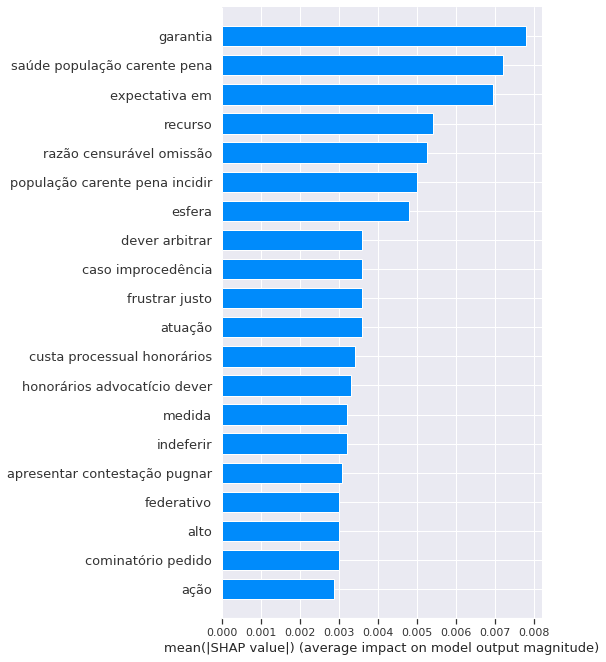

parcialmente


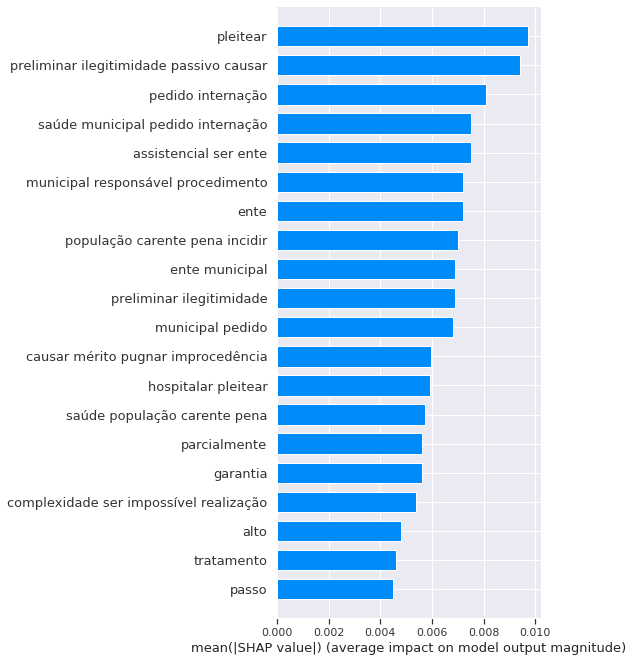

procedente


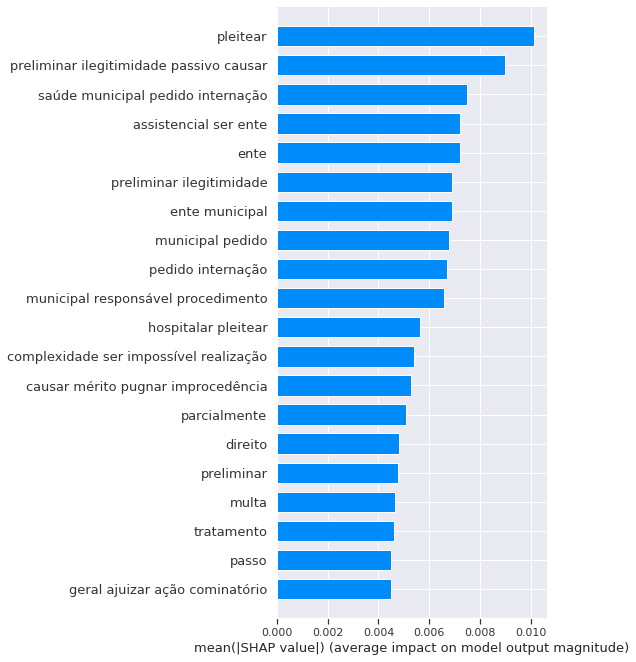

In [ ]:
shap.initjs()
for i, shap_value in enumerate(shap_values):
  print(le.classes_[i])
  shap.summary_plot(shap_value, X_test, class_names=le.classes_[i],feature_names=vectorizer.get_feature_names_out(), plot_type="bar")